# **Time-Series Forecasting :  Facebook Prophet** 
## Service Level Forecasting

In [232]:
# pip install prophet
# pip install ipywidgets
# pip install notebook_tqdm

#### **Import Libraries**


In [233]:
import pandas as pd
from prophet import Prophet


## **Data Preprocessing**

**Load Dataset**

In [234]:
df_order = pd.read_csv("dataset_order.csv")
df_order.head()

,ord_date,supplier,item_description,po_qty,Store
0,12/31/2022,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,192,Store1
1,1/1/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,144,Store1
2,1/2/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,552,Store1
3,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,216,Store1
4,1/4/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,408,Store1


In [235]:
df_receiving = pd.read_csv("dataset_receiving.csv")
df_receiving.head()

,ord_date,rec_date,supplier,item_description,rec_qty,Store
0,12/31/2022,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,168,Store1
1,12/31/2022,1/4/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,24,Store1
2,1/1/2023,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,144,Store1
3,1/2/2023,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,168,Store1
4,1/2/2023,1/4/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,312,Store1


In [236]:
df_receiving = df_receiving.pivot_table(
    index = "ord_date",
    columns = ['Store'],
    values='rec_qty',
    aggfunc = 'sum'
).reset_index().rename(columns = {'Store1':'rec_qty'})
df_receiving.head() 

Store,ord_date,rec_qty
0,1/1/2023,144
1,1/10/2023,168
2,1/11/2023,120
3,1/12/2023,48
4,1/13/2023,72


**joining dataframe**

In [237]:
df = df_order.merge(df_receiving, on='ord_date', how='left')
df.head()

,ord_date,supplier,item_description,po_qty,Store,rec_qty
0,12/31/2022,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,192,Store1,192
1,1/1/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,144,Store1,144
2,1/2/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,552,Store1,504
3,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,216,Store1,216
4,1/4/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,408,Store1,408


**Calculating service level**

In [238]:
df['service_level'] =  df["rec_qty"] / df["po_qty"] * 100

In [239]:
df.head()

,ord_date,supplier,item_description,po_qty,Store,rec_qty,service_level
0,12/31/2022,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,192,Store1,192,100.000000
1,1/1/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,144,Store1,144,100.000000
2,1/2/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,552,Store1,504,91.304348
3,1/3/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,216,Store1,216,100.000000
4,1/4/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,408,Store1,408,100.000000


In [240]:
df.tail()

,ord_date,supplier,item_description,po_qty,Store,rec_qty,service_level
55,2/24/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,72,Store1,72,100.000000
56,2/25/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,144,Store1,96,66.666667
57,2/26/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,48,Store1,48,100.000000
58,2/27/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,336,Store1,288,85.714286
59,2/28/2023,COCA_COLA_COMPANY,COCA_COLA_CAN_250ML,336,Store1,336,100.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ord_date          60 non-null     object 
 1   supplier          60 non-null     object 
 2   item_description  60 non-null     object 
 3   po_qty            60 non-null     int64  
 4   Store             60 non-null     object 
 5   rec_qty           60 non-null     int64  
 6   service_level     60 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.4+ KB


In [242]:
df.describe()

,po_qty,rec_qty,service_level
count,60.000000,60.000000,60.000000
mean,205.050000,190.800000,92.032687
std,165.357489,161.234727,16.292310
min,24.000000,24.000000,20.000000
25%,66.500000,48.000000,93.138587
50%,144.000000,120.000000,100.000000
75%,312.000000,294.000000,100.000000
max,624.000000,624.000000,100.000000


In [243]:
df.columns

Index(['ord_date', 'supplier', 'item_description', 'po_qty', 'Store',
       'rec_qty', 'service_level'],
      dtype='object')

In [245]:
df = df[['ord_date','service_level']].rename(columns={'ord_date':'ds','service_level':'y'})
df

,ds,y
0,12/31/2022,100.000000
1,1/1/2023,100.000000
2,1/2/2023,91.304348
3,1/3/2023,100.000000
4,1/4/2023,100.000000
5,1/5/2023,100.000000
6,1/6/2023,100.000000
7,1/7/2023,66.666667
8,1/8/2023,100.000000
9,1/9/2023,86.956522


In [250]:
# Creating an instance of the Prophet class and training the model
m = Prophet() #instantiating a new Prophet object
model = m.fit(df) #build the model with the historical data

future = model.make_future_dataframe(periods=30, freq='D') #build the dataframe containing the predictions (and the historical data with the model fit)
forecast = model.predict(future) #The forecast object here is a new dataframe that includes a column yhat with the forecast

forecast[['ds', 'yhat']].tail()

22:20:36 - cmdstanpy - INFO - Chain [1] start processing
22:20:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
85,2023-03-26,93.411258
86,2023-03-27,88.811408
87,2023-03-28,89.785992
88,2023-03-29,82.164381
89,2023-03-30,86.748351


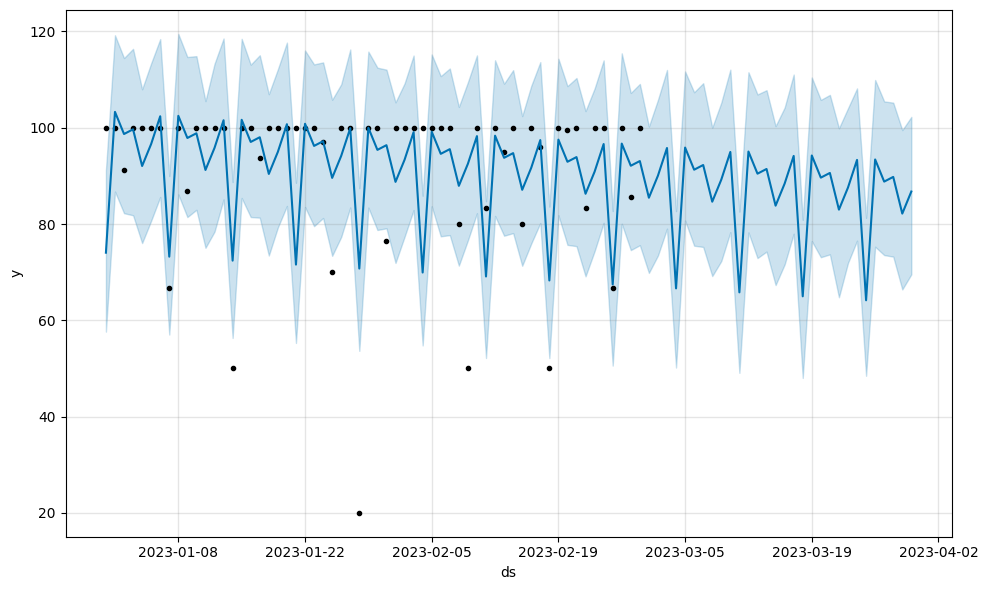

In [251]:
forecasted_service_level = model.plot(forecast, uncertainty=True)

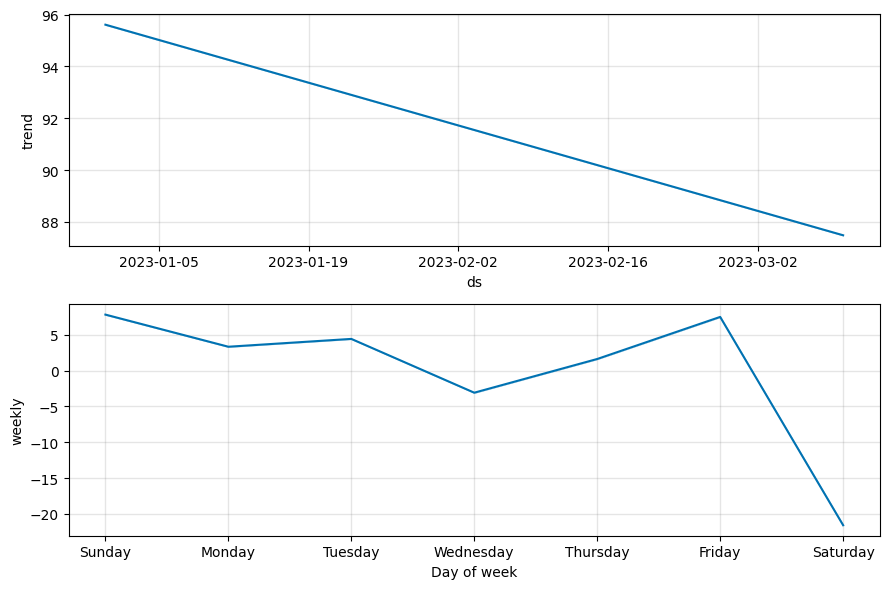

In [219]:
plot_components = model.plot_components(forecast)